In [1]:
notebook_fiducia = "FONDO_DE_INVERSION_COLECTIVA_ABIERTO_RENTA_ALTA_CONVICCION"
notebook_execution_date = "2020-11-29"

In [2]:
import os
import dotenv
dotenv.load_dotenv()
repo = os.environ.get('REPO')

In [3]:
notebook_features_template = f"{repo}/data/{notebook_execution_date}/{notebook_fiducia}/features"
notebook_labels_template = f"{repo}/data/{notebook_execution_date}/{notebook_fiducia}/labels"

In [4]:
NOTEBOOK_FEATURES = [
    "unit_value____",
    "1st_variation____",
    "2nd_variation____"
]

In [5]:
SERIES_NAMES = [
    "Num_Invers",
    "Valor_fondo_al_cierre_del_dia_t",
    "Num_unidades",
    "Valor_unidad_para_las_operaciones_del_dia_t"
]

In [6]:
import numpy as np
import pandas as pd

In [7]:
from financial_ml.core import *
from features.buy_daily_during_bullish import *

In [8]:
class Parquet2Features(DF2Features):
    
    def build(self, filename):
        df = pd.read_parquet(filename)
        return super().build(df)
    
from abc import ABC, abstractmethod

class Label(ABC):
    
    def __init__(self, filename):
        self.df = pd.read_parquet(filename)
    
    def to_df(self):
        return self.df.copy()

In [9]:
def build_features(serie_name, diff_level):
    builder = Parquet2Features()
    features = builder.build(f"{notebook_features_template}/{diff_level}{serie_name}.parquet")
    return features.to_df()

def build_labels(serie_name, diff_level):
    label = Label(f"{notebook_labels_template}/{diff_level}{serie_name}.parquet")
    return label.to_df()

In [10]:
features = []
for serie_name in SERIES_NAMES:
    for diff_level in NOTEBOOK_FEATURES:
        df = build_features(serie_name, diff_level)
        df.loc[:, "serie"] = serie_name
        df.loc[:, "diff_level"] = diff_level
        features.append(df)
        
features = pd.concat(features).reset_index(drop=True)
features.head()

,last_week_sum,last_week_std,last_month_sum,last_month_mean,last_month_std,last_year_sum,last_year_mean,last_year_std,serie,diff_level
0,10072.0,16.697590,39994.0,1333.133333,79.221528,191768.0,532.688889,349.835859,Num_Invers,unit_value____
1,10138.0,24.417987,40284.0,1342.800000,80.229155,193246.0,536.794444,352.383357,Num_Invers,unit_value____
2,10200.0,24.956152,40549.0,1351.633333,80.828675,194716.0,540.877778,354.828605,Num_Invers,unit_value____
3,10262.0,21.594752,40799.0,1359.966667,81.275387,196179.0,544.941667,357.239048,Num_Invers,unit_value____
4,10309.0,18.526686,41052.0,1368.400000,80.663028,197638.0,548.994444,359.603550,Num_Invers,unit_value____


In [17]:
features_stats = features["diff_level"] + features["serie"]
assert features_stats.value_counts().shape[0] == 12
features_stats.value_counts()

unit_value____Num_Invers                                        1261
unit_value____Valor_unidad_para_las_operaciones_del_dia_t       1261
unit_value____Valor_fondo_al_cierre_del_dia_t                   1261
unit_value____Num_unidades                                      1261
1st_variation____Valor_fondo_al_cierre_del_dia_t                1260
1st_variation____Valor_unidad_para_las_operaciones_del_dia_t    1260
1st_variation____Num_Invers                                     1260
1st_variation____Num_unidades                                   1260
2nd_variation____Valor_fondo_al_cierre_del_dia_t                1259
2nd_variation____Valor_unidad_para_las_operaciones_del_dia_t    1259
2nd_variation____Num_unidades                                   1259
2nd_variation____Num_Invers                                     1259
dtype: int64

In [11]:
labels = []
for serie_name in SERIES_NAMES:
    for diff_level in NOTEBOOK_FEATURES:
        df = build_labels(serie_name, diff_level)
        df.loc[:, "serie"] = serie_name
        df.loc[:, "diff_level"] = diff_level
        labels.append(df)
        
labels = pd.concat(labels).reset_index(drop=True)
labels.head()

,value,serie,diff_level
0,10.0,Num_Invers,unit_value____
1,13.0,Num_Invers,unit_value____
2,15.0,Num_Invers,unit_value____
3,22.0,Num_Invers,unit_value____
4,26.0,Num_Invers,unit_value____


In [18]:
labels_stats = labels["diff_level"] + labels["serie"]
assert labels_stats.value_counts().shape[0] == 12
labels_stats.value_counts()

unit_value____Num_Invers                                        1621
unit_value____Valor_unidad_para_las_operaciones_del_dia_t       1621
unit_value____Valor_fondo_al_cierre_del_dia_t                   1621
unit_value____Num_unidades                                      1621
1st_variation____Valor_fondo_al_cierre_del_dia_t                1620
1st_variation____Valor_unidad_para_las_operaciones_del_dia_t    1620
1st_variation____Num_Invers                                     1620
1st_variation____Num_unidades                                   1620
2nd_variation____Valor_fondo_al_cierre_del_dia_t                1619
2nd_variation____Valor_unidad_para_las_operaciones_del_dia_t    1619
2nd_variation____Num_unidades                                   1619
2nd_variation____Num_Invers                                     1619
dtype: int64

In [76]:
features_df = pd.DataFrame({'index': list(range(1259))})
for key, serie_features in features.groupby(['serie', 'diff_level']):
    df = serie_features.copy()
    df = df.drop(['serie', 'diff_level'], axis=1)
    df = df[-1259:].reset_index(drop=True)
    suffix = key[1] + key[0] + "____"
    df.columns = suffix + df.columns
    df.loc[:, 'index'] = df.index
    features_df = features_df.merge(df, on='index')

features_df = features_df.drop(['index'], axis=1)
features_df.head()

,1st_variation____Num_Invers____last_week_sum,1st_variation____Num_Invers____last_week_std,1st_variation____Num_Invers____last_month_sum,1st_variation____Num_Invers____last_month_mean,1st_variation____Num_Invers____last_month_std,1st_variation____Num_Invers____last_year_sum,1st_variation____Num_Invers____last_year_mean,1st_variation____Num_Invers____last_year_std,2nd_variation____Num_Invers____last_week_sum,2nd_variation____Num_Invers____last_week_std,...,2nd_variation____Valor_unidad_para_las_operaciones_del_dia_t____last_year_mean,2nd_variation____Valor_unidad_para_las_operaciones_del_dia_t____last_year_std,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_week_sum,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_week_std,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_month_sum,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_month_mean,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_month_std,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_year_sum,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_year_mean,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____last_year_std
0,0.042924,0.007003,0.197874,0.006596,0.006796,4.929322,0.013693,0.045864,-1.490688,1.000802,...,-8.582081,76.721098,82652.86,39.091344,352953.32,11765.110667,76.496559,3887990.71,10799.974194,488.758190
1,0.042924,0.007003,0.185579,0.006186,0.006811,4.462655,0.012396,0.039126,-1.490688,1.000802,...,-8.575101,76.721766,82677.22,40.284001,353136.62,11771.220667,74.258871,3889720.29,10804.778583,490.391392
2,0.032383,0.007030,0.188008,0.006267,0.006719,4.280837,0.011891,0.038093,-0.791907,0.978876,...,-8.568526,76.722401,82730.51,38.303305,353319.85,11777.328333,71.380893,3891679.46,10810.220722,490.898981
3,0.046370,0.008860,0.206863,0.006895,0.006989,4.299692,0.011944,0.038089,-0.952486,0.992288,...,-6.820369,83.743954,82463.18,97.941691,353245.40,11774.846667,77.059207,3893381.15,10814.947639,490.041469
4,0.056098,0.009165,0.207756,0.006925,0.007018,4.313572,0.011982,0.038084,-1.069357,0.993485,...,-6.823190,83.743740,82214.69,122.229619,353157.92,11771.930667,82.932317,3895082.59,10819.673861,489.130246


In [77]:
labels_df = pd.DataFrame({'index': list(range(1259))})
for key, serie_features in labels.groupby(['serie', 'diff_level']):
    df = serie_features.copy()
    df = df.drop(['serie', 'diff_level'], axis=1)
    df = df[-1259:].reset_index(drop=True)
    suffix = key[1] + key[0] + "____"
    df.columns = suffix + df.columns
    df.loc[:, 'index'] = df.index
    labels_df = labels_df.merge(df, on='index')

labels_df = labels_df.drop(['index'], axis=1)
labels_df.head()

,1st_variation____Num_Invers____value,2nd_variation____Num_Invers____value,unit_value____Num_Invers____value,1st_variation____Num_unidades____value,2nd_variation____Num_unidades____value,unit_value____Num_unidades____value,1st_variation____Valor_fondo_al_cierre_del_dia_t____value,2nd_variation____Valor_fondo_al_cierre_del_dia_t____value,unit_value____Valor_fondo_al_cierre_del_dia_t____value,1st_variation____Valor_unidad_para_las_operaciones_del_dia_t____value,2nd_variation____Valor_unidad_para_las_operaciones_del_dia_t____value,unit_value____Valor_unidad_para_las_operaciones_del_dia_t____value
0,-0.004024,-1.245976,1485.0,0.019324,0.633358,1.117156e+07,-0.000034,-1.001223,1.321991e+11,-0.000035,-1.004017,11833.54
1,0.000000,-1.000000,1485.0,0.000000,-1.000000,1.117156e+07,-0.000034,0.001079,1.321945e+11,-0.000035,0.000035,11833.13
2,0.000000,0.000000,1485.0,0.000000,0.000000,1.117156e+07,-0.000034,-0.000020,1.321900e+11,-0.000035,0.000035,11832.72
3,0.018855,-0.698781,1513.0,0.000000,0.000000,1.117156e+07,-0.011317,327.650138,1.306940e+11,-0.021806,628.338879,11574.70
4,0.013880,-0.263880,1534.0,0.010723,-128683.004039,1.129135e+07,0.012145,-2.073211,1.322813e+11,-0.000069,-0.996830,11573.90


In [79]:
## Some utitlities to do some brute force regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble

In [81]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, \
                r2_score, max_error, median_absolute_error

def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat)/y))

def median_absolute_percentage_error(y, yhat):
    return np.median(np.abs((y - yhat)/y))

def compute_prediction_metrics(y_test, y_pred):
    return {
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'evs': explained_variance_score(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'mdae': median_absolute_error(y_test, y_pred),
        'mape': mean_absolute_percentage_error(y_test, y_pred),
        'mdape': median_absolute_percentage_error(y_test, y_pred)
    }


from sklearn.model_selection import GridSearchCV

def run_grid_search(model, X, y, params):
    search = GridSearchCV(
        model, params, 
        scoring=make_scorer(mean_absolute_percentage_error),
        cv=5, n_jobs=-1)
    search.fit(X, y)
    
    # search.best_score_
    
    ## Tambien puedo retornar el modelo configurado: search.best_estimator_
    return pd.DataFrame(search.cv_results_), search.best_params_

MODELS = {
    "linear_simple": LinearRegression,
    "linear_ridged": Ridge,
    "gradient_boosting": ensemble.GradientBoostingRegressor,
    "random_forest": ensemble.RandomForestRegressor
}

def get_features_importance_for_model(model):
    if isinstance(model, LinearRegression):
        return model.coef_
    if isinstance(model, Ridge):
        return model.coef_
    if isinstance(model, ensemble.RandomForestRegressor):
        return model.feature_importances_
    if isinstance(model, ensemble.GradientBoostingRegressor):
        return model.feature_importances_    
    raise Error('Modelo no soportado')

def build_model(name, params=None):
    assert name in MODELS
    builder = MODELS[name]
    model = builder()
    
    if params is not None:
        myparams = params.copy()
        model.set_params(**myparams)
    return model

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_statistic(y):
    MSG = "El estadistico tienen una media {mean} con desviación estandar: {std}"

    fig = plt.figure(figsize=(14, 10))
    
    ax = fig.add_subplot(3, 1, 1)
    sns.boxplot(y, ax=ax)
    
    ax = fig.add_subplot(3, 1, 2)
    sns.boxplot(y, ax=ax, showfliers=False)

    ax = fig.add_subplot(3, 1, 3)
    sns.distplot(y, ax=ax)

    print(MSG.format(
        mean=np.mean(y),
        std=np.std(y),
    ))

In [167]:
X = features_df.values
y = labels_df['1st_variation____Valor_unidad_para_las_operaciones_del_dia_t____value'].values
y = labels_df['unit_value____Valor_unidad_para_las_operaciones_del_dia_t____value'].values

In [182]:
bins = np.linspace(0, max(y), 2)
y_binned = np.digitize(y, bins)

In [183]:
np.bincount(y_binned)

array([   0, 1258,    1])

In [184]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [185]:
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0) #, stratify=y_binned)

In [186]:
params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

reg = build_model("linear_simple")
linear_results, linear_best_param = run_grid_search(reg, X_train, y_train, params)
linear_results.loc[:, "model"] = "linear_simple"
linear_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,model
0,0.013029,0.001240,0.000525,0.000035,True,True,"{'fit_intercept': True, 'normalize': True}",0.004013,0.003357,0.004107,0.004509,0.003889,0.003975,0.000372,4,linear_simple
1,0.013330,0.003781,0.000545,0.000223,True,False,"{'fit_intercept': True, 'normalize': False}",0.004028,0.003357,0.004099,0.004509,0.003889,0.003977,0.000372,3,linear_simple
2,0.012975,0.000814,0.000506,0.000089,False,True,"{'fit_intercept': False, 'normalize': True}",1.050279,1.081926,1.090855,1.092667,1.057481,1.074642,0.017486,1,linear_simple
3,0.010861,0.001345,0.000403,0.000082,False,False,"{'fit_intercept': False, 'normalize': False}",1.050279,1.081926,1.090855,1.092667,1.057481,1.074642,0.017486,1,linear_simple


In [187]:
models_metrics = pd.concat([
    linear_results
])

models_metrics = models_metrics.reset_index(drop=True)
models_metrics.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,model
0,0.013029,0.001240,0.000525,0.000035,True,True,"{'fit_intercept': True, 'normalize': True}",0.004013,0.003357,0.004107,0.004509,0.003889,0.003975,0.000372,4,linear_simple
1,0.013330,0.003781,0.000545,0.000223,True,False,"{'fit_intercept': True, 'normalize': False}",0.004028,0.003357,0.004099,0.004509,0.003889,0.003977,0.000372,3,linear_simple
2,0.012975,0.000814,0.000506,0.000089,False,True,"{'fit_intercept': False, 'normalize': True}",1.050279,1.081926,1.090855,1.092667,1.057481,1.074642,0.017486,1,linear_simple
3,0.010861,0.001345,0.000403,0.000082,False,False,"{'fit_intercept': False, 'normalize': False}",1.050279,1.081926,1.090855,1.092667,1.057481,1.074642,0.017486,1,linear_simple


In [188]:
best_model_with_params = models_metrics.loc[
    models_metrics['mean_test_score'] == models_metrics['mean_test_score'].min()]

best_model_with_params = best_model_with_params.iloc[0]

In [189]:

MSG = """
El modelo con los mejores resultados fue: {model}, los mejores parametros fueron: {params}
"""

print(MSG.format(
    model=best_model_with_params["model"],
    params=best_model_with_params["params"]
))


El modelo con los mejores resultados fue: linear_simple, los mejores parametros fueron: {'fit_intercept': True, 'normalize': True}



In [190]:
## Estimador con las mejores features

reg = build_model(best_model_with_params["model"], params=best_model_with_params["params"])
reg.fit(X, y)
yhat = reg.predict(X)

El estadistico tienen una media 12994.538180254753 con desviación estandar: 798.6067349161879


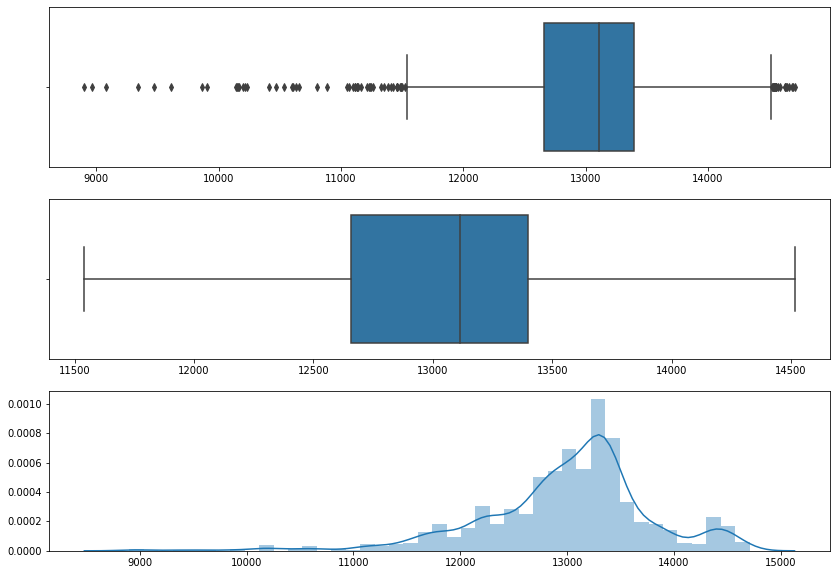

In [191]:
plot_statistic(yhat)

El estadistico tienen una media 12994.517482128673 con desviación estandar: 801.2342126534443


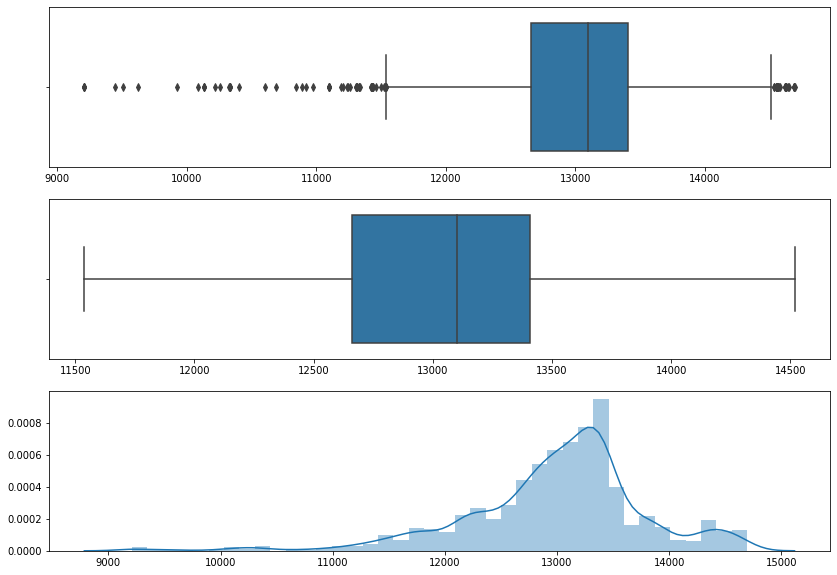

In [192]:
plot_statistic(y)

In [193]:
reg = build_model(best_model_with_params["model"], params=best_model_with_params["params"])
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)

In [194]:
compute_prediction_metrics(y_test, yhat)

{'mse': 6958.634376232292,
 'mae': 56.97487268330882,
 'evs': 0.9898183565807002,
 'r2': 0.9895244887909428,
 'mdae': 40.659999999999854,
 'mape': 0.004570979941464969,
 'mdape': 0.003060355068112062}

El estadistico tienen una media 12985.645264550265 con desviación estandar: 815.0315039751654


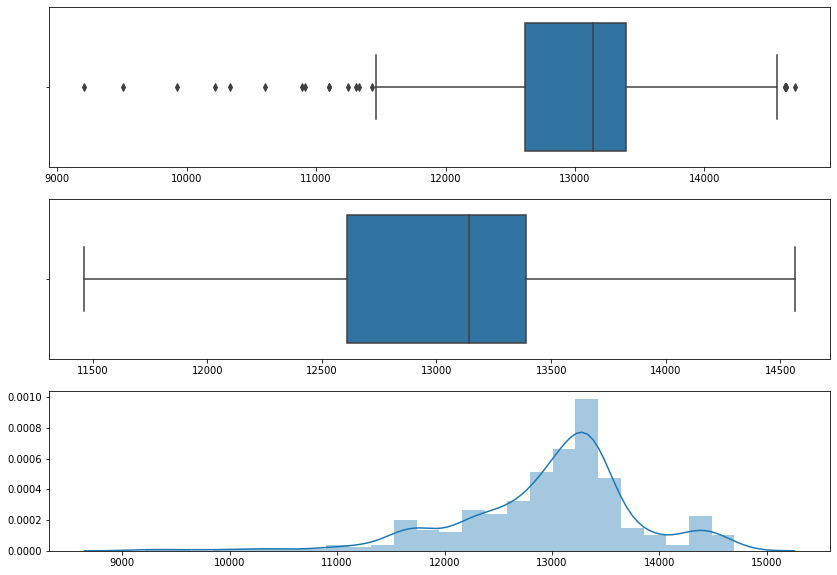

In [195]:
plot_statistic(y_test)

El estadistico tienen una media 12999.617001145585 con desviación estandar: 799.8932737993699


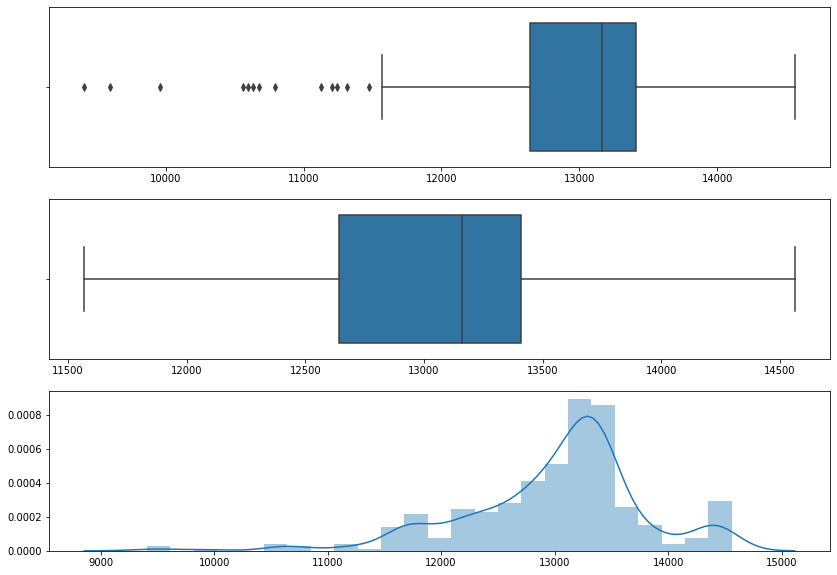

In [196]:
plot_statistic(yhat)